<a href="https://colab.research.google.com/github/Ultan-Kearns/ZTM-Tensorflow-Developer-Certificate/blob/master/01_neural_network_regression_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Regresion with Neural Networks in Tensorflow
There are many definitions for a regression problem but in our case, we're going to simplify it: predicting a numerical variable based on some other combination of variables, even shorter predicting a number

In [132]:
# import tensorflow
import tensorflow as tf
print(tf.__version__)

2.15.0


## Creating data to view and fit

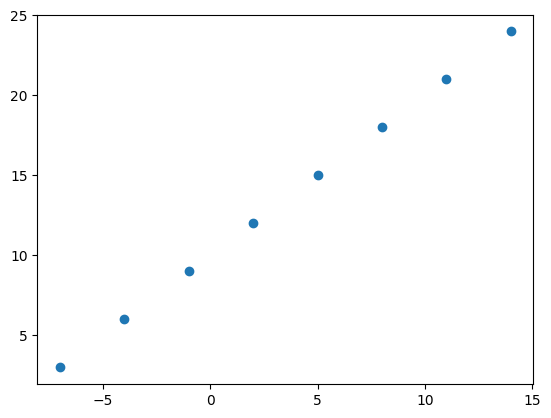

In [133]:
import numpy as np
import matplotlib.pyplot as plt
# create features
X = np.array([-7.0,-4.0,-1.0,2.0,5.0,8.0,11.0,14.0])
# create labels
y = np.array([3.0,6.0,9.0,12.0,15.0,18.0,21.0,24.0])

plt.scatter(X,y)

In [134]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and output shapes

In [135]:
X[0], y[0]

(-7.0, 3.0)

In [136]:
X[1],y[1]

(-4.0, 6.0)

In [137]:
# Create a demo tensor for our housing price prediction problem
house_info = tf.constant(["bedroom","bathroom","garage"])
house_price = tf.constant([939700])
house_info,house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [138]:
input_shape = X.shape
output_shape = y.shape
input_shape, output_shape

((8,), (8,))

In [139]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

((), ())

In [140]:
X[0].ndim

0

In [141]:
X[0],y[0]

(-7.0, 3.0)

In [142]:
# Turn numpy arrays into tensors
X = tf.cast(tf.constant(X),dtype=tf.float32)
y = tf.cast(tf.constant(y),dtype=tf.float32)
X,y.shape


(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 TensorShape([8]))

In [143]:
input_shape = X[0].shape
output_shape=y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

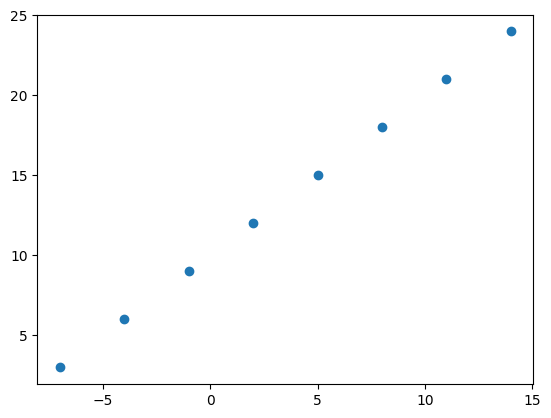

In [144]:
plt.scatter(X,y)

## Steps in modelling with tensorflow
1. Creating a model - define input and output  layers as well as hidden layers of model
2. Compiling a model - define loss function(tells how wrong model is) and the optimizer(improves model and tells us how to improve) evaluation metrics(gauges how well model performs)
3. Fitting the model(where model learns patterns in data)

In [145]:
tf.random.set_seed(42)

In [146]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1))

In [147]:
# 1. Create a model using sequential API(specified to problem)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
])
# 2. compile model
model.compile(loss=tf.keras.losses.mae, optimizer=tf.keras.optimizers.SGD(),metrics=["mae"]) # mean absolute error
# 3. fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5) # <- updated line


Epoch 1/5
1/1 [==============================] - 0s 435ms/step - loss: 8.4541 - mae: 8.4541
Epoch 2/5
1/1 [==============================] - 0s 16ms/step - loss: 8.3216 - mae: 8.3216
Epoch 3/5
1/1 [==============================] - 0s 14ms/step - loss: 8.1891 - mae: 8.1891
Epoch 4/5
1/1 [==============================] - 0s 12ms/step - loss: 8.0566 - mae: 8.0566
Epoch 5/5
1/1 [==============================] - 0s 16ms/step - loss: 7.9241 - mae: 7.9241


In [148]:
X,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [149]:
y_pred = model.predict([11.0])
y_pred

1/1 [==============================] - 0s 74ms/step


array([[17.833424]], dtype=float32)

## Improving our model
We can improve our model, by altering the steps we took to create the model

1. creating a model - here we might add more layers, increase hidden units within each hidden layer, change activation func of layers
2. compiling a model - here we might change optimization function or perhaps the learning rate of the optimization function
3. fitting a model - here we might fit a model for more epochs or on more data

In [150]:
# 1. Create a model using sequential API(specified to problem)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
])
# 2. compile model
model.compile(loss=tf.keras.losses.mae, optimizer=tf.keras.optimizers.SGD(),metrics=["mae"]) # mean absolute error
# 3. fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100) # <- updated line


Epoch 1/100
1/1 [==============================] - 0s 325ms/step - loss: 13.9741 - mae: 13.9741
Epoch 2/100
1/1 [==============================] - 0s 14ms/step - loss: 13.8416 - mae: 13.8416
Epoch 3/100
1/1 [==============================] - 0s 18ms/step - loss: 13.7091 - mae: 13.7091
Epoch 4/100
1/1 [==============================] - 0s 9ms/step - loss: 13.5766 - mae: 13.5766
Epoch 5/100
1/1 [==============================] - 0s 18ms/step - loss: 13.4441 - mae: 13.4441
Epoch 6/100
1/1 [==============================] - 0s 13ms/step - loss: 13.3116 - mae: 13.3116
Epoch 7/100
1/1 [==============================] - 0s 15ms/step - loss: 13.1791 - mae: 13.1791
Epoch 8/100
1/1 [==============================] - 0s 11ms/step - loss: 13.0466 - mae: 13.0466
Epoch 9/100
1/1 [==============================] - 0s 11ms/step - loss: 12.9141 - mae: 12.9141
Epoch 10/100
1/1 [==============================] - 0s 13ms/step - loss: 12.7816 - mae: 12.7816
Epoch 11/100
1/1 [==============================]

In [151]:
# Lets see if pred has improved
y_pred = model.predict([17.0])
y_pred

1/1 [==============================] - 0s 84ms/step


array([[29.51727]], dtype=float32)

In [152]:
# 1. Create a model using sequential API(specified to problem)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50,activation=None),
    tf.keras.layers.Dense(1),
])
# 2. compile model
model.compile(loss=tf.keras.losses.mae, optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),metrics=["mae"]) # mean absolute error
# 3. fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100) # <- updated line


Epoch 1/100
1/1 [==============================] - 1s 961ms/step - loss: 12.8645 - mae: 12.8645
Epoch 2/100
1/1 [==============================] - 0s 19ms/step - loss: 12.1838 - mae: 12.1838
Epoch 3/100
1/1 [==============================] - 0s 16ms/step - loss: 11.4985 - mae: 11.4985
Epoch 4/100
1/1 [==============================] - 0s 19ms/step - loss: 10.8075 - mae: 10.8075
Epoch 5/100
1/1 [==============================] - 0s 12ms/step - loss: 10.1086 - mae: 10.1086
Epoch 6/100
1/1 [==============================] - 0s 16ms/step - loss: 9.3988 - mae: 9.3988
Epoch 7/100
1/1 [==============================] - 0s 19ms/step - loss: 8.6748 - mae: 8.6748
Epoch 8/100
1/1 [==============================] - 0s 13ms/step - loss: 7.9334 - mae: 7.9334
Epoch 9/100
1/1 [==============================] - 0s 13ms/step - loss: 7.1714 - mae: 7.1714
Epoch 10/100
1/1 [==============================] - 0s 12ms/step - loss: 6.8072 - mae: 6.8072
Epoch 11/100
1/1 [==============================] - 0s 12m

In [153]:
X,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [154]:
# Lets see if pred has improved
y_pred = model.predict([17.0])
y_pred

1/1 [==============================] - 0s 169ms/step


array([[26.951086]], dtype=float32)

## Evaluating a model
In practice, a typical workflow you'll go through when building a neural network is:

``` build a model -> fit it -> evaluate it -> tweak a model -> evaluate it -> repeat

When it comes to evaluation experiment experiment experiment
When it comes to evaluation it's
> visualization, visualization, visualization
It's a good idea to visualize
* The data - imagine what it looks like
* The model itself - what does our model look like?
* The training of a model - how does model perform while it learns?
* The predictions of the model - how do predictions line up with the ground truth

In [155]:
# Make a bigger dataset
X = tf.range(-100,100,4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [156]:
# Make labels for the datase
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

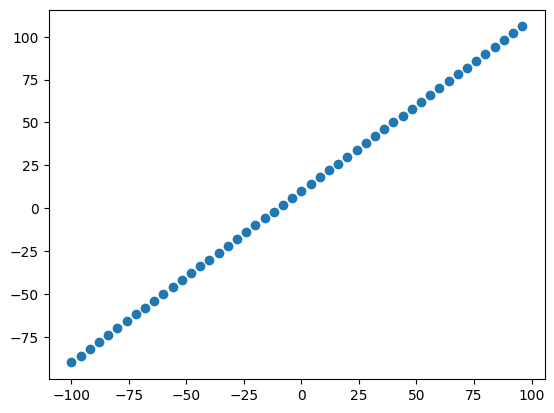

In [157]:
# visualize the data
plt.scatter(X,y)

### The 3 sets....

* **Training** - the model used to train the data, usually 70 - 80 % of the total amount of data
* **Validation** - Used to validate how well the model performs usually around 10% of the total available data
* **Test** - provides an unbiased account of how well the model is performing usually 10 - 15 % of the total available data

We want the model to be able to generalize - performs well on data which the model hasn't seen before and learns generalised patterns within the data

In [158]:
# Check the length of how many samples we have
len(X)

50

In [159]:
# Split the data into train and test sets
X_train = X[:40] # first 40 are training samples
y_train = y[:40]

X_test = X[40:]
y_test = y[40:]

len(X_train),len(X_test),len(y_train),len(y_test)

(40, 10, 40, 10)

### Visualizing the data
Now we've got the data in training and test sets... let's visualize it again!

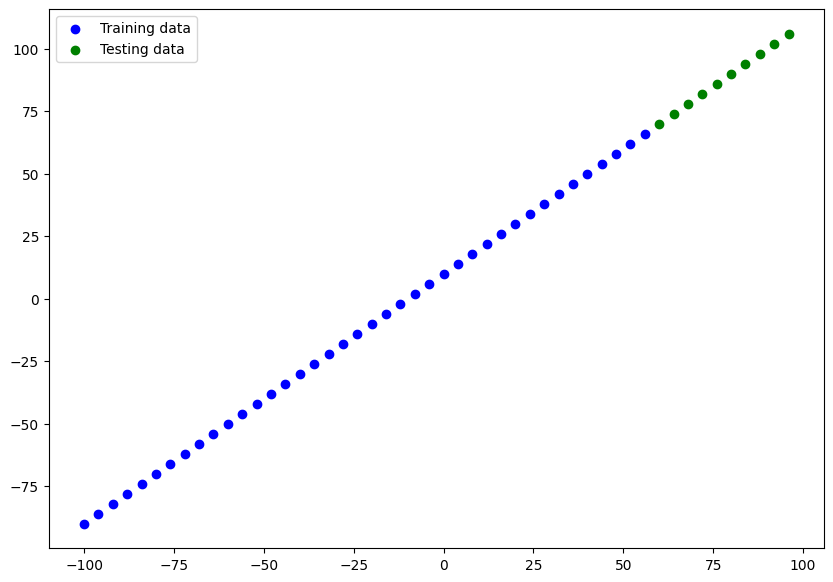

In [160]:
plt.figure(figsize=(10,7))

# plot the training data in blue
plt.scatter(X_train,y_train, c='b',label="Training data")
plt.scatter(X_test, y_test, c="g",label=("Testing data"))
plt.legend()

# Let's have a look at how to build a neural network with our data

In [161]:
# 1. Create a model using sequential API(specified to problem)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
])
# 2. compile model
model.compile(loss=tf.keras.losses.mae, optimizer=tf.keras.optimizers.SGD(),metrics=["mae"]) # mean absolute error
# 3. fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100) # <- updated line


Epoch 1/100
2/2 [==============================] - 0s 8ms/step - loss: 10.1264 - mae: 10.1264
Epoch 2/100
2/2 [==============================] - 0s 8ms/step - loss: 10.7684 - mae: 10.7684
Epoch 3/100
2/2 [==============================] - 0s 9ms/step - loss: 11.4992 - mae: 11.4992
Epoch 4/100
2/2 [==============================] - 0s 8ms/step - loss: 10.1737 - mae: 10.1737
Epoch 5/100
2/2 [==============================] - 0s 8ms/step - loss: 13.1157 - mae: 13.1157
Epoch 6/100
2/2 [==============================] - 0s 9ms/step - loss: 13.7504 - mae: 13.7504
Epoch 7/100
2/2 [==============================] - 0s 9ms/step - loss: 10.4245 - mae: 10.4245
Epoch 8/100
2/2 [==============================] - 0s 8ms/step - loss: 11.6472 - mae: 11.6472
Epoch 9/100
2/2 [==============================] - 0s 10ms/step - loss: 9.8754 - mae: 9.8754
Epoch 10/100
2/2 [==============================] - 0s 8ms/step - loss: 9.9218 - mae: 9.9218
Epoch 11/100
2/2 [==============================] - 0s 8ms/ste

# Visualizing the model

In [162]:
model.build()

In [163]:
model.summary()

Model: "sequential_34"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_41 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [164]:
X[0],y[0]

(<tf.Tensor: shape=(), dtype=int32, numpy=-100>,
 <tf.Tensor: shape=(), dtype=int32, numpy=-90>)

In [165]:
# let's create a model which builds automatically by defining the input_shape argument
tf.random.set_seed(42)
# create a model same as above
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10,input_shape=[1],name="input_layer"),
    tf.keras.layers.Dense(10,activation="relu"),
    tf.keras.layers.Dense(10,activation="relu"),
    tf.keras.layers.Dense(1,name="output_layer")
], name="One_of_the_many_models_we_will_build")
# compile the model
model.compile(loss=tf.keras.losses.mae,optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),metrics=["mae"])
#fit the model
model.summary()

Model: "One_of_the_many_models_we_will_build"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 dense_42 (Dense)            (None, 10)                110       
                                                                 
 dense_43 (Dense)            (None, 10)                110       
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 251 (1004.00 Byte)
Trainable params: 251 (1004.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


* **Total parameters** - total nums of parameters in the model
* **Trainable parameters** - these are the parameters (patterns) the model can update as it trains
* **Non-trainable params** - these parameters aren't updated during training(this usually occurs during transfer learning)

** Resource ** For more in depth overview of trainable parameters within a layer checkout MIT's intro to deep-learning video http://introtodeeplearning.com/

In [166]:
# lets fit our model to the training data
model.fit(X_train,y_train, epochs=100, verbose=0)

In [167]:
model.summary()

Model: "One_of_the_many_models_we_will_build"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 dense_42 (Dense)            (None, 10)                110       
                                                                 
 dense_43 (Dense)            (None, 10)                110       
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 251 (1004.00 Byte)
Trainable params: 251 (1004.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


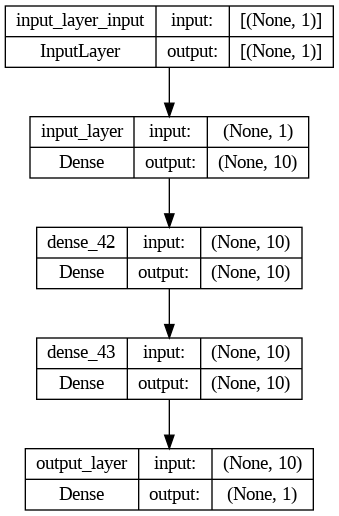

In [168]:
plot_model(model,show_shapes=True)

### Visualizing the model's predictions

To visualize predictions, it's a good idea to plot them against the ground truth labels.

Often you'll see this in the form of `y_test`or `y_true`vs `y_pred`(ground truth versus models prediction's)

In [169]:
y_pred = model.predict(X_test)
y_pred

1/1 [==============================] - 0s 86ms/step


array([[ 79.13773 ],
       [ 84.34975 ],
       [ 89.56177 ],
       [ 94.77378 ],
       [ 99.98579 ],
       [105.19781 ],
       [110.409805],
       [115.621826],
       [120.83384 ],
       [126.04586 ]], dtype=float32)

In [170]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

**Note** if you feel like you're going to reuse a piece of code turn it into function

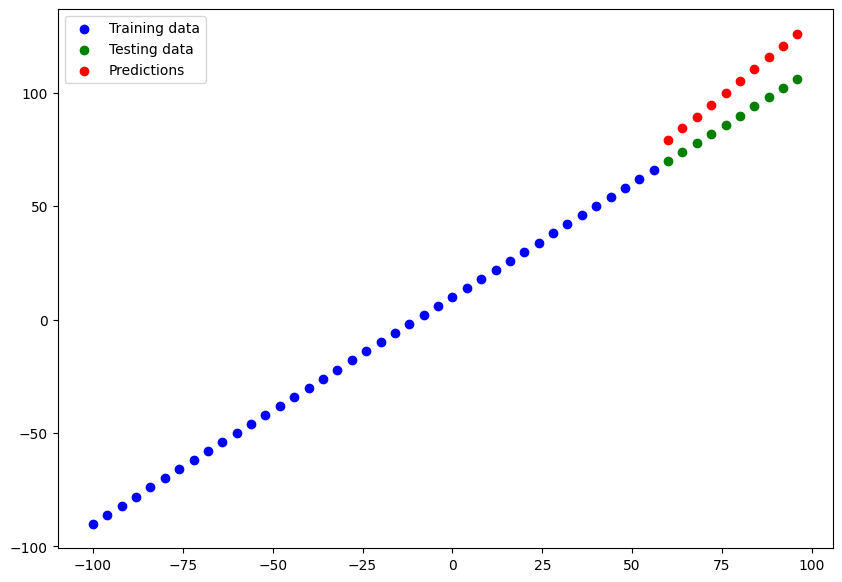

In [171]:
# let's create a plotting function
def plot_predictions(train_data=X_train,train_labels=y_train,test_data=X_test,test_labels=y_test,predictions=y_pred):
  """
  Plots training data, test data, and compares predictions to ground truth
  """
  plt.figure(figsize=[10,7])
  # Training data
  plt.scatter(train_data,train_labels,c="blue",label="Training data")
  # Test data
  plt.scatter(test_data,test_labels,c="g",label="Testing data")
  # plot predictions
  plt.scatter(test_data,predictions,c="r",label="Predictions")
  plt.legend()
plot_predictions(train_data=X_train,train_labels=y_train,test_data=X_test,test_labels=y_test, predictions=y_pred)

### Evaluating our model's predictions with regression evaluation metrics

Depending on the problem you're working on, there will be different evaluation metrics to evaluate your model's performance.  

Since we're working on regression problems, two of the main metrics we will use are:

* MAE - mean absolute error: on average, how wrong are our predictions
* MSE - mean squared error: square of average errors

In [172]:
# Evaluate the model on the test set
model.evaluate(X_test,y_test)

1/1 [==============================] - 0s 171ms/step - loss: 14.5918 - mae: 14.5918


[14.591794967651367, 14.591794967651367]

In [173]:
# Calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_true=y_test,y_pred=tf.constant(y_pred))
print(mae)

tf.Tensor(
[11.944906 10.33005  10.       11.109512 13.591472 17.358246 22.409805
 27.621826 32.83384  38.04586 ], shape=(10,), dtype=float32)


In [174]:
y_pred

array([[ 79.13773 ],
       [ 84.34975 ],
       [ 89.56177 ],
       [ 94.77378 ],
       [ 99.98579 ],
       [105.19781 ],
       [110.409805],
       [115.621826],
       [120.83384 ],
       [126.04586 ]], dtype=float32)

In [175]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [176]:
# needed to be done for both mae and mse as they weren't of the same shame(10,1) for y_pred vs (10,) for y_test
y_pred = tf.squeeze(y_pred)

In [177]:
# Calculate the mean squared error
mse = tf.metrics.mean_squared_error(y_true=y_test,y_pred=tf.constant(y_pred))
print(mse)

tf.Tensor(225.03955, shape=(), dtype=float32)


In [213]:
def mean_absolute_error(y_true,y_pred):
  return tf.metrics.mean_absolute_error(y_true=y_test,y_pred=tf.squeeze(tf.constant(y_pred)))

def mean_squared_error(y_true,y_pred):
  return tf.metrics.mean_squared_error(y_true=y_test,y_pred=tf.squeeze(tf.constant(y_pred)))


### Running experiements to improve our model

```
Build a model -> fit it -> evaluate it -> tweak it -> repeat
```

1. Get more data - more examples for the model to train on
2. Make the model larger (using a more complex model) - this might be adding more layers or units per layer
3. Train for longer number of epochs

Let's do 3 different experiements

1. `model_1` - same as the original model, 1 layer, trained for 100 epochs
2. `model_2` - 2 layers trained for 100 epochs
3. `model_3` - 2 layers trained for 500 epochs
4.
5.

In [200]:
X_train = X[:40] # first 40 are training samples
y_train = y[:40]

X_test = X[40:]
y_test = y[40:]

In [201]:
X_train,y_train


(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56], dtype=int32)>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66], dtype=int32)>)

In [203]:
X_train = tf.expand_dims(X_train, axis=-1)

In [204]:
X_train

<tf.Tensor: shape=(40, 1), dtype=int32, numpy=
array([[-100],
       [ -96],
       [ -92],
       [ -88],
       [ -84],
       [ -80],
       [ -76],
       [ -72],
       [ -68],
       [ -64],
       [ -60],
       [ -56],
       [ -52],
       [ -48],
       [ -44],
       [ -40],
       [ -36],
       [ -32],
       [ -28],
       [ -24],
       [ -20],
       [ -16],
       [ -12],
       [  -8],
       [  -4],
       [   0],
       [   4],
       [   8],
       [  12],
       [  16],
       [  20],
       [  24],
       [  28],
       [  32],
       [  36],
       [  40],
       [  44],
       [  48],
       [  52],
       [  56]], dtype=int32)>

In [205]:
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])
model_1.compile(loss=tf.keras.losses.mae,optimizer=tf.keras.optimizers.SGD(),metrics=["mae"])
model_1.fit(X_train,y_train,epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 15ms/step - loss: 19.5230 - mae: 19.5230
Epoch 2/100
2/2 [==============================] - 0s 12ms/step - loss: 8.1567 - mae: 8.1567
Epoch 3/100
2/2 [==============================] - 0s 12ms/step - loss: 10.2189 - mae: 10.2189
Epoch 4/100
2/2 [==============================] - 0s 12ms/step - loss: 12.5894 - mae: 12.5894
Epoch 5/100
2/2 [==============================] - 0s 12ms/step - loss: 11.6385 - mae: 11.6385
Epoch 6/100
2/2 [==============================] - 0s 11ms/step - loss: 10.7438 - mae: 10.7438
Epoch 7/100
2/2 [==============================] - 0s 10ms/step - loss: 8.8092 - mae: 8.8092
Epoch 8/100
2/2 [==============================] - 0s 13ms/step - loss: 8.1104 - mae: 8.1104
Epoch 9/100
2/2 [==============================] - 0s 11ms/step - loss: 18.7204 - mae: 18.7204
Epoch 10/100
2/2 [==============================] - 0s 11ms/step - loss: 14.4498 - mae: 14.4498
Epoch 11/100
2/2 [==============================] - 0s 

1/1 [==============================] - 0s 49ms/step


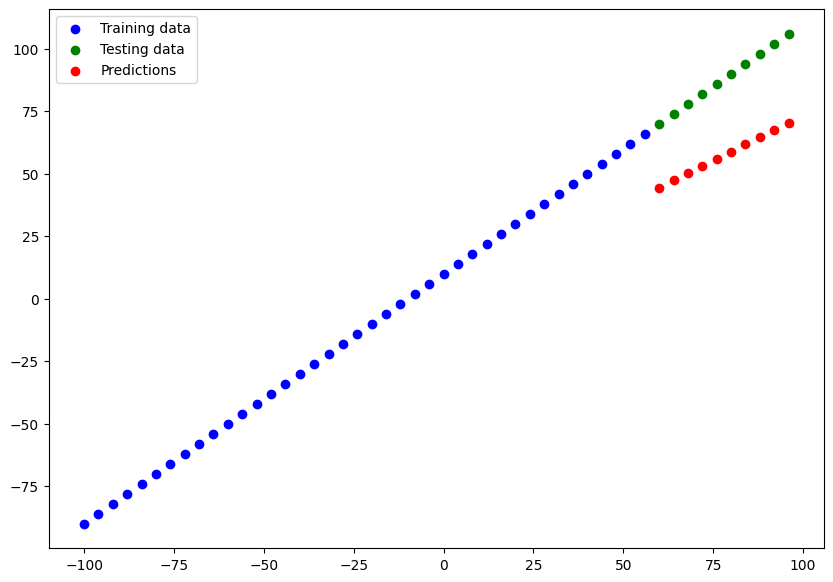

In [208]:
# make and plot predictions for model 1
y_preds_1 = model_1.predict(X_test)
plot_predictions(X_train,y_train,X_test,y_test,y_preds_1)

In [216]:
mae_1= mean_absolute_error(y_test,y_preds_1)
mse_1= mean_squared_error(y_test,y_preds_1)
mae_1,mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=30.559912>,
 <tf.Tensor: shape=(), dtype=float32, numpy=944.2736>)

In [225]:
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
model_2.compile(loss=tf.keras.losses.mae,optimizer=tf.keras.optimizers.SGD(),metrics=["mse"])
model_2.fit(X_train,y_train,epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 12ms/step - loss: 39.6682 - mae: 39.6682
Epoch 2/100
2/2 [==============================] - 0s 11ms/step - loss: 24.1847 - mae: 24.1847
Epoch 3/100
2/2 [==============================] - 0s 12ms/step - loss: 29.4928 - mae: 29.4928
Epoch 4/100
2/2 [==============================] - 0s 14ms/step - loss: 27.2620 - mae: 27.2620
Epoch 5/100
2/2 [==============================] - 0s 10ms/step - loss: 14.8726 - mae: 14.8726
Epoch 6/100
2/2 [==============================] - 0s 10ms/step - loss: 11.8261 - mae: 11.8261
Epoch 7/100
2/2 [==============================] - 0s 10ms/step - loss: 11.1485 - mae: 11.1485
Epoch 8/100
2/2 [==============================] - 0s 9ms/step - loss: 11.0676 - mae: 11.0676
Epoch 9/100
2/2 [==============================] - 0s 12ms/step - loss: 40.2794 - mae: 40.2794
Epoch 10/100
2/2 [==============================] - 0s 11ms/step - loss: 27.6983 - mae: 27.6983
Epoch 11/100
2/2 [==============================] 

1/1 [==============================] - 0s 84ms/step


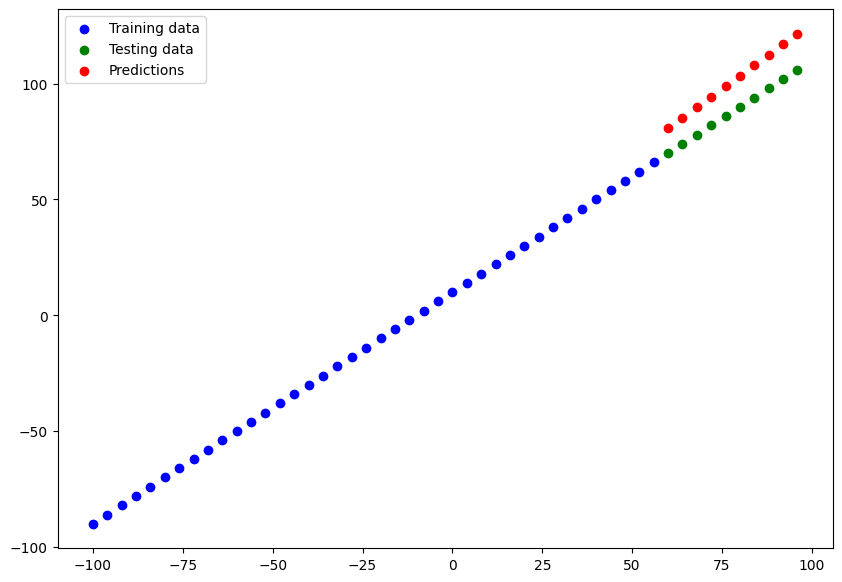

In [227]:
y_preds_2 = model_2.predict(X_test)
plot_predictions(X_train,y_train,X_test,y_test,y_preds_2)

In [229]:
# calculate model 2 evaluation metrics
mae_2 = mean_absolute_error(y_test,y_preds_2)
mse_2 = mean_squared_error(y_test,y_preds_2)
mae_2,mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=13.176166>,
 <tf.Tensor: shape=(), dtype=float32, numpy=175.8389>)

In [230]:
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
model_3.compile(loss=tf.keras.losses.mae,optimizer=tf.keras.optimizers.SGD(),metrics=["mse"])
model_3.fit(X_train,y_train,epochs=500)

Epoch 1/500
2/2 [==============================] - 1s 13ms/step - loss: 46.1415 - mse: 3291.4419
Epoch 2/500
2/2 [==============================] - 0s 13ms/step - loss: 26.6110 - mse: 919.8844
Epoch 3/500
2/2 [==============================] - 0s 22ms/step - loss: 32.1194 - mse: 1533.0920
Epoch 4/500
2/2 [==============================] - 0s 14ms/step - loss: 26.0124 - mse: 985.6437
Epoch 5/500
2/2 [==============================] - 0s 16ms/step - loss: 14.2843 - mse: 250.6435
Epoch 6/500
2/2 [==============================] - 0s 13ms/step - loss: 11.4156 - mse: 147.9342
Epoch 7/500
2/2 [==============================] - 0s 9ms/step - loss: 12.4484 - mse: 203.1715
Epoch 8/500
2/2 [==============================] - 0s 24ms/step - loss: 10.9691 - mse: 143.8329
Epoch 9/500
2/2 [==============================] - 0s 29ms/step - loss: 38.9415 - mse: 2363.0918
Epoch 10/500
2/2 [==============================] - 0s 11ms/step - loss: 26.5317 - mse: 989.5176
Epoch 11/500
2/2 [===================

1/1 [==============================] - 0s 54ms/step


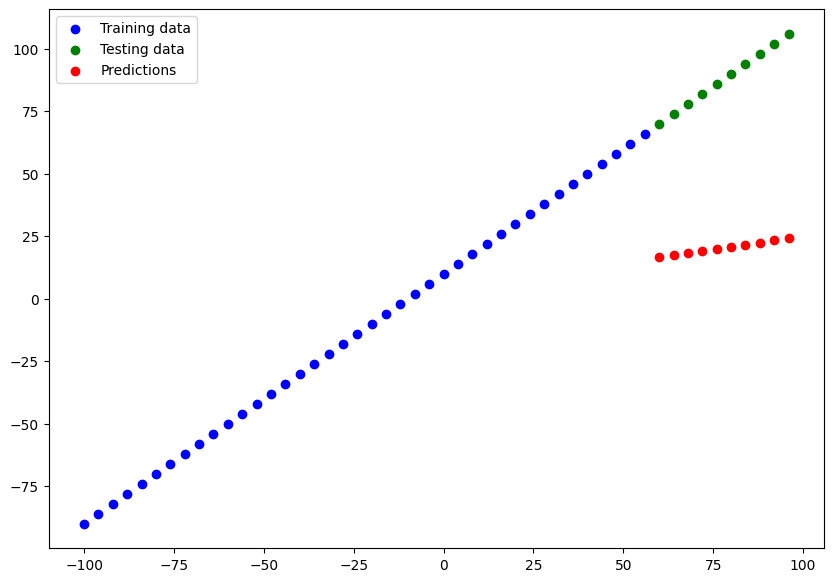

In [231]:
y_preds_3 = model_3.predict(X_test)
plot_predictions(X_train,y_train,X_test,y_test,y_preds_3)

In [232]:
# calculate model 2 evaluation metrics
mae_3 = mean_absolute_error(y_test,y_preds_3)
mse_3 = mean_squared_error(y_test,y_preds_3)
mae_3,mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=67.524704>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4643.423>)

**Note** You want to start with small experiments - start with small models then scale


### Comparing results of our experiments

We've run a few experiments let's compare the results